In [1]:
import numba
from numba import guvectorize, jit, float64, void
import numpy as np
import os

In [2]:

import matplotlib.pyplot as plt
%matplotlib inline
import collections
import quantities as pq
import numpy as np
import time

from neuronunit.optimization.optimization_management import inject_and_plot_model,model_to_rheo
import numpy as np

from numba import guvectorize
from jithub.models import model_classes
import unittest
from collections import OrderedDict
model = model_classes.ADEXPModel()
model.attrs = OrderedDict(model.attrs)

In [3]:
model.attrs['dt'] = 0.25
#model.attrs['cm'] = 1.8
model = model_to_rheo(model)
print(model.rheobase)
amp = model.rheobase
ALLEN_DELAY = 1000.0 * pq.ms
ALLEN_DURATION = 2000.0 * pq.ms
uc = {
"amplitude": amp,
"duration": ALLEN_DURATION,
"delay": ALLEN_DELAY,
}


1.351753345443285 pA


In [4]:
amplitude=1.351753345443285 * pq.pA
delay=ALLEN_DELAY
duration=ALLEN_DURATION
padding=0 * pq.ms
padding = float(padding)
amplitude = float(amplitude.magnitude)
duration = float(duration)
delay = float(delay)
stim = {"start": delay, "stop": duration + delay, "pA": amplitude, "padding":padding}
model.attrs.update(stim)
print(model.attrs)
model.attrs = OrderedDict(model.attrs)
import numpy as np
len(model.attrs)
'''

cm = arr[i,0]
v_spike = arr[i,1]
v_reset = arr[i,2]
v = v_rest = arr[i,3]
tau_m = arr[i,4]
a = arr[i,5]
b = arr[i,6]
delta_T = arr[i,7]
tau_w = arr[i,8]
v_thresh = arr[i,9]
spike_delta = arr[i,10]
dt = arr[i,11]
start = arr[i,12]
stop = arr[i,13]
amp = arr[i,14]
padding = arr[i,15]
'''

{'cm': 0.281, 'v_spike': -40.0, 'v_reset': -70.6, 'v_rest': -70.6, 'tau_m': 9.3667, 'a': 4.0, 'b': 0.0805, 'delta_T': 2.0, 'tau_w': 144.0, 'v_thresh': -50.4, 'spike_delta': 30, 'dt': 0.25, 'start': 1000.0, 'stop': 3000.0, 'pA': 1.351753345443285, 'padding': 0.0}


'\n\ncm = arr[i,0]\nv_spike = arr[i,1]\nv_reset = arr[i,2]\nv = v_rest = arr[i,3]\ntau_m = arr[i,4]\na = arr[i,5]\nb = arr[i,6]\ndelta_T = arr[i,7]\ntau_w = arr[i,8]\nv_thresh = arr[i,9]\nspike_delta = arr[i,10]\ndt = arr[i,11]\nstart = arr[i,12]\nstop = arr[i,13]\namp = arr[i,14]\npadding = arr[i,15]\n'

In [7]:
def make_gene_array(gene_models,shared_model):
    '''
    
    '''
    param_vec = np.array([ np.array([ v for v in list(m.attrs.values())], dtype=np.float32) for m in gene_models ])
    shared_model._backend.vector_attrs = param_vec
    vm_results = shared_model.inject_square_current_vectorized(param_vec)
    return vm_results,param_vec
gene_models = [model for i in range(0,10)]

vm_results,param_vec = make_gene_array(gene_models,model)


# JIT 6.6 ms ± 426 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
results = model.inject_square_current_vectorized(param_vec)
np.shape(results)

(10, 16000)

In [9]:
%matplotlib inline

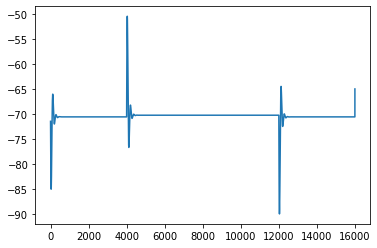

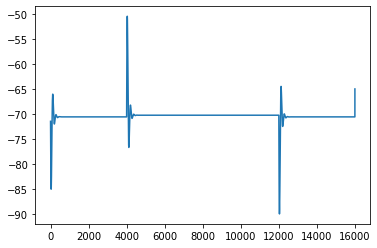

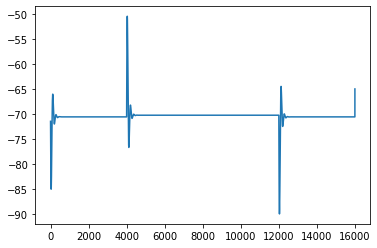

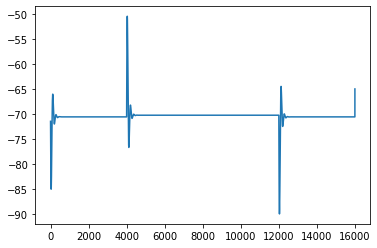

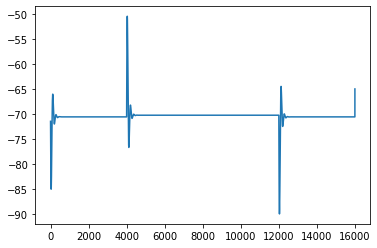

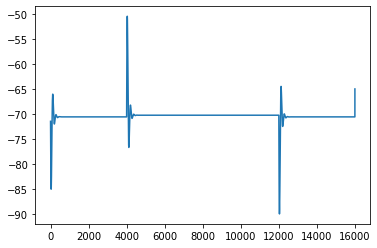

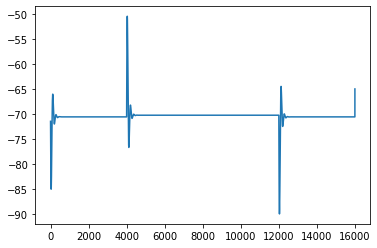

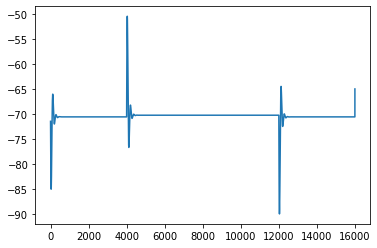

In [ ]:
import matplotlib.pyplot as plt
for res in results:
    plt.plot([i for i in range(0,len(res[:]))],[i for i in res[:]])
    plt.show()